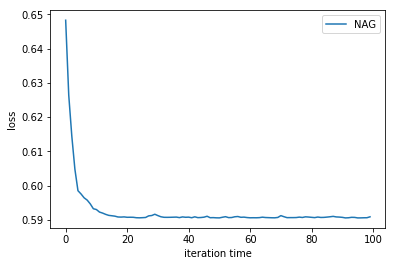

2017-12-15 11:34:33.323839


In [1]:
import os
import numpy as np
import random
import math
import datetime
from sklearn.datasets import load_svmlight_file

os.chdir('E://test')
# 读取数据
X_train, Y_train = load_svmlight_file('a9a.txt', n_features=123)
X_test, Y_test = load_svmlight_file('a9a_testing.txt', n_features=123)

X_train = X_train.toarray()
X_test = X_test.toarray()
Y_train = Y_train.reshape(Y_train.shape[0], 1)
Y_test = Y_test.reshape(Y_test.shape[0], 1)

#初始化参数
w=np.zeros((X_train.shape[1], 1))
LAMDA=1
GAMA=0.9
learning_rate=0.1
num=200
iter_number=100
threshold=0.5
shape1=range(0,X_train.shape[0])

#实现随机取样
def select_function(X, Y, n):
    random_num=random.sample(shape1, n)
    X_random=np.ones((0, X.shape[1]))
    Y_random=np.ones((0, Y.shape[1]))

    for i in random_num:
        X_random = np.r_[X_random, X[i].reshape(1, X.shape[1])]
        Y_random= np.r_[Y_random, Y[i].reshape(1, Y.shape[1])]
    return X_random, Y_random

def NAG(X, Y, w):
    w1 = w - GAMA * vt1
    loss_gradient=np.zeros(w.shape)
    for i in range(0, Y.shape[0]):
        Xi = X[i].reshape(1, X.shape[1]).T
        Yi = Y[i][0]
        loss_gradient = loss_gradient+ Yi / (1 + math.exp(Yi * np.dot(w1.T, Xi)[0][0])) * Xi
    gradient =( LAMDA *  w1 ) - 1 / num * loss_gradient
    vt = GAMA * vt1 + learning_rate * gradient
    w = w - vt
    return w

NAG_loss_list = []
for i in range(0, iter_number):
    vt1=np.zeros(w.shape)
    x_select, y_select=select_function(X_train, Y_train, num)
    w = NAG(x_select, y_select, w)
    loss_sum=0
    for i in range(0, Y_test.shape[0]):
        Xi = X_test[i].reshape(1, X_test.shape[1]).T
        Yi = Y_test[i][0]
        loss_sum += math.log(1 + math.exp(-Yi * np.dot(w.T, Xi)[0][0]))

    NAG_test_loss = LAMDA/2 * np.dot(w.T, w)[0][0] + 1/X_test.shape[0] * loss_sum
    NAG_loss_list.append(NAG_test_loss)

import matplotlib.pyplot as plt
plt.xlabel('iteration time')
plt.ylabel('loss')
x = range(iter_number)
plt.plot(x, NAG_loss_list,label = 'NAG')
plt.legend()
plt.show()

print(datetime.datetime.now())